# Read data

In [376]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [377]:
! git clone https://github.com/JNADatathon2022/Datathon

fatal: destination path 'Datathon' already exists and is not an empty directory.


In [378]:
! mv Datathon/data/* . && ls

mv: cannot stat 'Datathon/data/*': No such file or directory


In [379]:
# read train data
df_orders = pd.read_csv("test.csv", sep=";")
df_products = pd.read_csv("product_attributes.csv", sep=",")
df_dists = pd.read_csv("cities_data.csv", sep=";")
df_weight = pd.read_csv("product_weight_class.csv", sep = ",")
df_cities_costs = pd.read_csv("cities_data_costs.csv", sep = ",")

# read test data
df_test = pd.read_csv("test.csv", sep=";")

# Data Cleaning


In [380]:
df_orders.loc[df_orders['origin_port'] == 'BCN', 'origin_port'] = 'Barcelona'
df_orders.loc[df_orders['origin_port'] == 'ATHENAS', 'origin_port'] = 'Athens'
df_orders.loc[df_orders['logistic_hub'].isnull(), 'logistic_hub'] = '-1'

In [381]:
df_orders['units'] = pd.qcut(df_orders.units, q=10, precision=1,
                                 labels=False)

Text(0.5, 1.0, 'units')

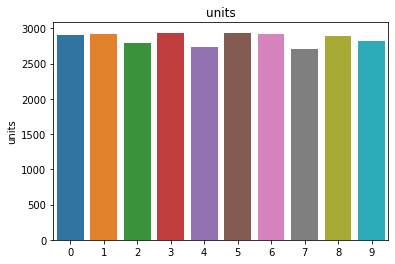

In [382]:
sns.barplot(x=df_orders['units'].value_counts().index, y=df_orders['units'].value_counts()).set_title('units')

# Data Joining

In [383]:
df_orders.columns

Index(['order_id', 'origin_port', '3pl', 'customs_procedures', 'logistic_hub',
       'customer', 'product_id', 'units'],
      dtype='object')

In [384]:
rows = len(df_orders.axes[0]) 
  
print("Number of Rows: " + str(rows)) 

Number of Rows: 28563


In [385]:
#Merge info about products
df_merge_product = pd.merge(df_products,df_weight,on='product_id')
df_merge_product.head()

,product_id,weight,material_handling,weight_class
0,1672707,2876,3,9
1,1694456,2785,5,9
2,1682865,2751,3,9
3,1689146,2736,0,9
4,1664069,2707,4,9


In [386]:
weight_av = np.average(df_merge_product["weight"].values)
print(weight_av)

1303.2979274611398


In [387]:
av_weight_class = np.average(df_merge_product["weight_class"].values)
av_weight_class = str(int(av_weight_class.round()))
print(av_weight_class)

5


In [388]:
counts = np.bincount(df_merge_product["material_handling"].values)
moda = np.argmax(counts)
print(moda)

5


In [389]:
df2 = pd.DataFrame({'product_id': ["1"],
                    'weight': [weight_av],
                    'material_handling': [moda],
                    'weight_class': [av_weight_class]})
df2.head()

,product_id,weight,material_handling,weight_class
0,1,1303.297927,5,5


In [390]:
df2.dtypes

product_id            object
weight               float64
material_handling      int64
weight_class          object
dtype: object

In [391]:
df_merge_product = df_merge_product.append(df2, ignore_index = True)

In [392]:
df_merge_product.dtypes

product_id            object
weight               float64
material_handling      int64
weight_class          object
dtype: object

In [393]:
df_merge_product['product_id'] = df_merge_product['product_id'].astype('str') 

In [394]:
df_merge_product.dtypes

product_id            object
weight               float64
material_handling      int64
weight_class          object
dtype: object

In [395]:
df_merge_product.tail()

,product_id,weight,material_handling,weight_class
768,1683403,161.000000,1,0
769,1699799,153.000000,3,0
770,1699768,139.000000,5,0
771,1660578,136.000000,5,0
772,1,1303.297927,5,5


In [396]:
df_orders_copy = df_orders

In [397]:
df_orders_copy.dtypes

order_id              object
origin_port           object
3pl                   object
customs_procedures    object
logistic_hub          object
customer              object
product_id             int64
units                  int64
dtype: object

In [398]:
df_orders_copy['product_id'] = df_orders_copy['product_id'].astype(str)

In [399]:
df_orders_copy.dtypes

order_id              object
origin_port           object
3pl                   object
customs_procedures    object
logistic_hub          object
customer              object
product_id            object
units                  int64
dtype: object

In [400]:
for index, row in df_orders_copy.iterrows():
  if(row["product_id"] == "-1"):
    df_orders_copy.at[index, "product_id"] = "1"
  elif(not (row["product_id"] in df_merge_product["product_id"].values)):
    #print(row)
    df_orders_copy.at[index, "product_id"] = "1"

In [401]:
print("city_from_name: ", (df_orders_copy["product_id"].unique()))

city_from_name:  ['1687644' '1699689' '1652615' '1669740' '1695138' '1690627' '1672714'
 '1660579' '1644308' '1681883' '1685211' '1672344' '1615677' '1699666'
 '1692948' '1696747' '1651366' '1660563' '1660580' '1649002' '1613321'
 '1699345' '1650715' '1669701' '1683392' '1683388' '1684808' '1699586'
 '1699135' '1683403' '1695139' '1670215' '1681379' '1690632' '1657437'
 '1683407' '1699242' '1652887' '1676566' '1682799' '1699694' '1662238'
 '1676565' '1620510' '1694456' '1650880' '1663337' '1666959' '1660897'
 '1622685' '1681377' '1682745' '1657063' '1685952' '1700118' '1650904'
 '1699022' '1688600' '1672345' '1680915' '1687521' '1699325' '1672706'
 '1697083' '1690621' '1683419' '1697085' '1687661' '1651377' '1671834'
 '1683634' '1699424' '1696799' '1679995' '1683700' '1662551' '1689457'
 '1689032' '1700139' '1692737' '1698913' '1683199' '1693618' '1684796'
 '1682681' '1683354' '1650905' '1699540' '1674635' '1672088' '1644050'
 '1669584' '1676564' '1676699' '1686762' '1666524' '1701405'

In [402]:
df_orders_copy.loc[df_orders_copy['product_id'] == "1"]

,order_id,origin_port,3pl,customs_procedures,logistic_hub,customer,product_id,units
347,b16e28fd37e5,Barcelona,v_003,DTP,Dusseldorf,Cologne,1,7
724,b40c2cef3343,Barcelona,v_003,CRF,Venlo,Madrid,1,4
1319,c352edc7c35f,Barcelona,v_003,DTD,Venlo,Bordeaux,1,3
1662,749e4800982e,Barcelona,v_003,CRF,Lille,Madrid,1,2
1697,1193bff2f1cd,Barcelona,v_003,DTD,Liege,Valencia,1,1
2506,4ee9f2bdcd18,Barcelona,v_003,CRF,Liege,Budapest,1,5
2654,a774d95031a1,Barcelona,v_003,DTD,Hamburg,Budapest,1,4
2714,42ee29d13cc4,Barcelona,v_003,CRF,Dusseldorf,Barcelona,1,1
3436,a70fec54f1fe,Barcelona,v_003,CRF,Hamburg,Marseille,1,2
3670,33301663d847,Barcelona,v_003,CRF,Rome,Milan,1,6


In [403]:
df_orders_copy.head()

,order_id,origin_port,3pl,customs_procedures,logistic_hub,customer,product_id,units
0,0e364fa5c795,Rotterdam,v_002,CRF,Warsaw,Munich,1687644,4
1,3ef49bd5a55b,Barcelona,v_002,CRF,Venlo,Berlin,1699689,0
2,9ab5b9685bd5,Rotterdam,v_004,DTD,Bratislava,Paris,1652615,6
3,bfce5b4fc4fa,Rotterdam,v_002,DTD,Rome,Hanover,1669740,8
4,d94453ec8ec5,Barcelona,v_001,CRF,Bratislava,Copenhagen,1695138,4


In [404]:
rows = len(df_orders_copy.axes[0]) 
  
print("Number of Rows: " + str(rows)) 

Number of Rows: 28563


In [405]:
df_orders_copy = pd.merge(df_orders_copy, df_merge_product, on = "product_id")
df_orders_copy.head()

,order_id,origin_port,3pl,customs_procedures,logistic_hub,customer,product_id,units,weight,material_handling,weight_class
0,0e364fa5c795,Rotterdam,v_002,CRF,Warsaw,Munich,1687644,4,1974.0,5,8
1,6c8c11251114,Rotterdam,v_002,CRF,Venlo,Barcelona,1687644,1,1974.0,5,8
2,81d3be5e1eff,Athens,v_002,DTD,Warsaw,Lyon,1687644,8,1974.0,5,8
3,870a9b65a1b5,Rotterdam,v_001,CRF,Dusseldorf,Berlin,1687644,8,1974.0,5,8
4,eff072956d66,Rotterdam,v_002,CRF,Rome,Milan,1687644,0,1974.0,5,8


In [406]:
rows = len(df_orders_copy.axes[0]) 
  
print("Number of Rows: " + str(rows)) 

Number of Rows: 28563


In [407]:
df_cities_costs.head()

,city_from_name,city_to_name,city_from_coord,city_to_coord,distance,weight_class,cost_per_unit,co2_per_unit
0,Dusseldorf,Zaragoza,"(51.2254018, 6.7763137)","(41.6521342, -0.8809428)",1214.4772,0,429.76,819.77
1,Dusseldorf,Zaragoza,"(51.2254018, 6.7763137)","(41.6521342, -0.8809428)",1214.4772,1,472.74,901.75
2,Dusseldorf,Zaragoza,"(51.2254018, 6.7763137)","(41.6521342, -0.8809428)",1214.4772,2,515.71,983.73
3,Dusseldorf,Zaragoza,"(51.2254018, 6.7763137)","(41.6521342, -0.8809428)",1214.4772,3,558.69,1065.70
4,Dusseldorf,Zaragoza,"(51.2254018, 6.7763137)","(41.6521342, -0.8809428)",1214.4772,4,601.66,1147.68


In [408]:
df_copy_2 = df_orders_copy.reindex(columns = df_orders_copy.columns.tolist() + ["distance", "cost_per_unit", "co2_per_unit"])
df_copy_2.head()

,order_id,origin_port,3pl,customs_procedures,logistic_hub,customer,product_id,units,weight,material_handling,weight_class,distance,cost_per_unit,co2_per_unit
0,0e364fa5c795,Rotterdam,v_002,CRF,Warsaw,Munich,1687644,4,1974.0,5,8,NaN,NaN,NaN
1,6c8c11251114,Rotterdam,v_002,CRF,Venlo,Barcelona,1687644,1,1974.0,5,8,NaN,NaN,NaN
2,81d3be5e1eff,Athens,v_002,DTD,Warsaw,Lyon,1687644,8,1974.0,5,8,NaN,NaN,NaN
3,870a9b65a1b5,Rotterdam,v_001,CRF,Dusseldorf,Berlin,1687644,8,1974.0,5,8,NaN,NaN,NaN
4,eff072956d66,Rotterdam,v_002,CRF,Rome,Milan,1687644,0,1974.0,5,8,NaN,NaN,NaN


In [409]:
rows = len(df_copy_2.axes[0]) 
  
print("Number of Rows: " + str(rows)) 

Number of Rows: 28563


In [410]:
#Prova
df_prova = df_cities_costs.loc[(df_cities_costs['city_from_name'] == "Dusseldorf") & (df_cities_costs['city_to_name'] == "Zaragoza") & (df_cities_costs["weight_class"] == 0)]
df_prova.head()

,city_from_name,city_to_name,city_from_coord,city_to_coord,distance,weight_class,cost_per_unit,co2_per_unit
0,Dusseldorf,Zaragoza,"(51.2254018, 6.7763137)","(41.6521342, -0.8809428)",1214.4772,0,429.76,819.77


In [411]:
cont = 0;
p = 0
for index, row in df_copy_2.iterrows():
    if(cont % 1000 == 0):
      print(cont)
    
    if(row["logistic_hub"] == "-1"):
        df_1 = df_cities_costs.loc[(df_cities_costs['city_from_name'] == row["origin_port"]) & 
                                       (df_cities_costs['city_to_name'] == row["customer"]) & 
                                       (df_cities_costs["weight_class"] == row["weight_class"])]
        if(df_1.empty):
            df_1 = df_cities_costs.loc[(df_cities_costs['city_from_name'] == row["customer"]) & 
                                       (df_cities_costs['city_to_name'] == row["origin_port"]) & 
                                       (df_cities_costs["weight_class"] == row["weight_class"])]
        
        if(df_1.empty):
          p = p+1
        else:
          n = df_1["distance"].values
          n = n[0]
          df_copy_2.at[index, "distance"] = n
    else:
        df_1 = df_cities_costs.loc[(df_cities_costs['city_from_name'] == row["origin_port"]) & 
                                       (df_cities_costs['city_to_name'] == row["logistic_hub"]) & 
                                       (df_cities_costs["weight_class"] == row["weight_class"])]
        if(df_1.empty):
            df_1 = df_cities_costs.loc[(df_cities_costs['city_from_name'] == row["logistic_hub"]) & 
                                       (df_cities_costs['city_to_name'] == row["origin_port"]) & 
                                       (df_cities_costs["weight_class"] == row["weight_class"])]
  
        df_2 = df_cities_costs.loc[(df_cities_costs['city_from_name'] == row["logistic_hub"]) & 
                                       (df_cities_costs['city_to_name'] == row["customer"]) & 
                                       (df_cities_costs["weight_class"] == row["weight_class"])]
        if(df_2.empty):
            df_2 = df_cities_costs.loc[(df_cities_costs['city_from_name'] == row["customer"]) & 
                                       (df_cities_costs['city_to_name'] == row["logistic_hub"]) & 
                                       (df_cities_costs["weight_class"] == row["weight_class"])]
        
        if(df_1.empty or df_2.empty):
          p = p+1
        else:
          n = df_1["distance"].values
          n = n[0]
          #print(n)
          m = df_2["distance"].values
          m = m[0]
          #print(m)
          df_copy_2.at[index, "distance"] = n+m
    cont = cont+1

df_copy_2.head()
print(p)

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
144


In [412]:
df_cities_costs.dtypes

city_from_name      object
city_to_name        object
city_from_coord     object
city_to_coord       object
distance           float64
weight_class         int64
cost_per_unit      float64
co2_per_unit       float64
dtype: object

In [413]:
cont = 0;
p = 0
for index, row in df_copy_2.iterrows():
    if(not np.isnan(row["distance"])):
        continue
    for prova in (5,4,3,6,2,7,1,8,0,9):
      if(np.isnan(row["distance"])):
        if(row["logistic_hub"] == "-1"):
            df_1 = df_cities_costs.loc[(df_cities_costs['city_from_name'] == row["origin_port"]) & 
                                          (df_cities_costs['city_to_name'] == row["customer"]) & 
                                          (df_cities_costs["weight_class"] == prova)]
            if(df_1.empty):
                df_1 = df_cities_costs.loc[(df_cities_costs['city_from_name'] == row["customer"]) & 
                                          (df_cities_costs['city_to_name'] == row["origin_port"]) & 
                                          (df_cities_costs["weight_class"] == prova)]
            
            if(df_1.empty):
              p = p+1
            else:
              n = df_1["distance"].values
              n = n[0]
              df_copy_2.at[index, "distance"] = n
        else:
            df_1 = df_cities_costs.loc[(df_cities_costs['city_from_name'] == row["origin_port"]) & 
                                          (df_cities_costs['city_to_name'] == row["logistic_hub"]) & 
                                          (df_cities_costs["weight_class"] == prova)]
            if(df_1.empty):
                df_1 = df_cities_costs.loc[(df_cities_costs['city_from_name'] == row["logistic_hub"]) & 
                                          (df_cities_costs['city_to_name'] == row["origin_port"]) & 
                                          (df_cities_costs["weight_class"] == prova)]
      
            df_2 = df_cities_costs.loc[(df_cities_costs['city_from_name'] == row["logistic_hub"]) & 
                                          (df_cities_costs['city_to_name'] == row["customer"]) & 
                                          (df_cities_costs["weight_class"] == prova)]
            if(df_2.empty):
                df_2 = df_cities_costs.loc[(df_cities_costs['city_from_name'] == row["customer"]) & 
                                          (df_cities_costs['city_to_name'] == row["logistic_hub"]) & 
                                          (df_cities_costs["weight_class"] == prova)]
            
            if(df_1.empty or df_2.empty):
              p = p+1
            else:
              n = df_1["distance"].values
              n = n[0]
              #print(n)
              m = df_2["distance"].values
              m = m[0]
              #print(m)
              df_copy_2.at[index, "distance"] = n+m
      else:
        continue
    cont = cont+1

df_copy_2.head()
print(p)

990


In [414]:
df_copy_2.head()

,order_id,origin_port,3pl,customs_procedures,logistic_hub,customer,product_id,units,weight,material_handling,weight_class,distance,cost_per_unit,co2_per_unit
0,0e364fa5c795,Rotterdam,v_002,CRF,Warsaw,Munich,1687644,4,1974.0,5,8,1951.6946,NaN,NaN
1,6c8c11251114,Rotterdam,v_002,CRF,Venlo,Barcelona,1687644,1,1974.0,5,8,1283.4637,NaN,NaN
2,81d3be5e1eff,Athens,v_002,DTD,Warsaw,Lyon,1687644,8,1974.0,5,8,2982.0120,NaN,NaN
3,870a9b65a1b5,Rotterdam,v_001,CRF,Dusseldorf,Berlin,1687644,8,1974.0,5,8,654.6792,NaN,NaN
4,eff072956d66,Rotterdam,v_002,CRF,Rome,Milan,1687644,0,1974.0,5,8,1746.5587,NaN,NaN


In [415]:
df_copy_2.loc[df_copy_2['distance'].isna()]

,order_id,origin_port,3pl,customs_procedures,logistic_hub,customer,product_id,units,weight,material_handling,weight_class,distance,cost_per_unit,co2_per_unit
71,df9f2ffbd271,Rotterdam,v_002,CRF,Rome,Rome,1669740,1,2072.0,2,9,NaN,NaN,NaN
527,22d9c2dbbcaf,Rotterdam,v_004,CRF,Rome,Rome,1644308,9,1088.0,3,3,NaN,NaN,NaN
721,d320bcfd7560,Athens,v_004,DTD,Rome,Rome,1644308,8,1088.0,3,3,NaN,NaN,NaN
1414,e15541bfdb2a,Rotterdam,v_004,CRF,Rome,Rome,1651366,5,1829.0,5,8,NaN,NaN,NaN
1478,af8757fdab9e,Rotterdam,v_004,DTP,Rome,Rome,1660580,8,1889.0,0,8,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26487,30d2cf2bfdca,Barcelona,v_002,CRF,Rome,Rome,1668347,0,1698.0,5,7,NaN,NaN,NaN
26614,ac8f11abbd29,Rotterdam,v_002,CRF,Rome,Rome,1650586,5,761.0,0,1,NaN,NaN,NaN
26672,22f0dea640cb,Barcelona,v_002,CRF,Rome,Rome,1700980,5,1443.0,2,6,NaN,NaN,NaN
27263,d08543385067,Athens,v_002,CRF,Rome,Rome,1699952,9,1551.0,4,6,NaN,NaN,NaN


In [416]:
copy3 = df_copy_2
for index, row in copy3.iterrows():
    if((row["logistic_hub"] == row["customer"]) & (row["logistic_hub"] != row["origin_port"])):
        df_1 = df_cities_costs.loc[(df_cities_costs['city_from_name'] == row["origin_port"]) & 
                                       (df_cities_costs['city_to_name'] == row["logistic_hub"]) & 
                                       (df_cities_costs["weight_class"] == row["weight_class"])]
        if(df_1.empty):
            df_1 = df_cities_costs.loc[(df_cities_costs['city_from_name'] == row["logistic_hub"]) & 
                                       (df_cities_costs['city_to_name'] == row["origin_port"]) & 
                                       (df_cities_costs["weight_class"] == row["weight_class"])]
        
        if(df_1.empty):
          p = p+1
        else:
          n = df_1["distance"].values
          n = n[0]
          copy3.at[index, "distance"] = n
    elif((row["logistic_hub"] == "-1") & (row["customer"] == row["origin_port"])):
        copy3.at[index, "distance"] = 0

In [417]:
copy3.loc[copy3['distance'].isna()]

,order_id,origin_port,3pl,customs_procedures,logistic_hub,customer,product_id,units,weight,material_handling,weight_class,distance,cost_per_unit,co2_per_unit


In [418]:
copy3.head()

,order_id,origin_port,3pl,customs_procedures,logistic_hub,customer,product_id,units,weight,material_handling,weight_class,distance,cost_per_unit,co2_per_unit
0,0e364fa5c795,Rotterdam,v_002,CRF,Warsaw,Munich,1687644,4,1974.0,5,8,1951.6946,NaN,NaN
1,6c8c11251114,Rotterdam,v_002,CRF,Venlo,Barcelona,1687644,1,1974.0,5,8,1283.4637,NaN,NaN
2,81d3be5e1eff,Athens,v_002,DTD,Warsaw,Lyon,1687644,8,1974.0,5,8,2982.0120,NaN,NaN
3,870a9b65a1b5,Rotterdam,v_001,CRF,Dusseldorf,Berlin,1687644,8,1974.0,5,8,654.6792,NaN,NaN
4,eff072956d66,Rotterdam,v_002,CRF,Rome,Milan,1687644,0,1974.0,5,8,1746.5587,NaN,NaN


In [419]:
rows = len(copy3.axes[0]) 
  
print("Number of Rows: " + str(rows)) 

Number of Rows: 28563


In [420]:
df = copy3.loc[:, (copy3.columns != "cost_per_unit") & (copy3.columns != "co2_per_unit")]

In [421]:
df.head()

,order_id,origin_port,3pl,customs_procedures,logistic_hub,customer,product_id,units,weight,material_handling,weight_class,distance
0,0e364fa5c795,Rotterdam,v_002,CRF,Warsaw,Munich,1687644,4,1974.0,5,8,1951.6946
1,6c8c11251114,Rotterdam,v_002,CRF,Venlo,Barcelona,1687644,1,1974.0,5,8,1283.4637
2,81d3be5e1eff,Athens,v_002,DTD,Warsaw,Lyon,1687644,8,1974.0,5,8,2982.0120
3,870a9b65a1b5,Rotterdam,v_001,CRF,Dusseldorf,Berlin,1687644,8,1974.0,5,8,654.6792
4,eff072956d66,Rotterdam,v_002,CRF,Rome,Milan,1687644,0,1974.0,5,8,1746.5587


In [422]:
df.loc[df['distance'].isna()]

,order_id,origin_port,3pl,customs_procedures,logistic_hub,customer,product_id,units,weight,material_handling,weight_class,distance


In [424]:
rows = len(df.axes[0]) 
  
print("Number of Rows: " + str(rows)) 

Number of Rows: 28563


In [423]:
df.to_csv("test_dataframe.csv", index=False)